## Data loading

### Subtask:
Load the e-waste data from the "World_data.csv" file into a pandas DataFrame.


**Reasoning**:
The task is to load the data from the "World_data.csv" file into a pandas DataFrame and display the first 5 rows. This can be done in a single code block by importing the pandas library, reading the CSV file into a DataFrame, and then using the `.head()` method to display the first 5 rows.



In [ ]:
import pandas as pd

df = pd.read_csv("World_data.csv")
display(df.head())

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,COU,Country,WASTE,Waste category,WST_OPER,Waste management operations,...,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE6,Total waste,GEN,Waste generated,...,15.832,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE6,Total waste,MKT,Products put on the market,...,36.975,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE6,Total waste,COL,Waste collected,...,10.937,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE_TEE,Temperature exchange equipment,MKT,Products put on the market,...,8.097,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE_TEE,Temperature exchange equipment,COL,Waste collected,...,3.877,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleaning

### Subtask:
Clean the e-waste data in the DataFrame `df` by handling missing values, identifying and addressing outliers, and removing duplicate rows.


**Reasoning**:
The subtask is to clean the e-waste data. The first step is to inspect the DataFrame `df` for missing values, which can be done using `.isnull().sum()`. Then, we will determine the number of rows and columns before cleaning.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Missing values per column:")
print(df.isnull().sum())

print("\nOriginal DataFrame shape:", df.shape)

Missing values per column:
STRUCTURE                         0
STRUCTURE_ID                      0
STRUCTURE_NAME                    0
ACTION                            0
COU                               0
Country                           0
WASTE                             0
Waste category                    0
WST_OPER                          0
Waste management operations       0
UNIT                              0
Unit of measure                   0
TIME_PERIOD                       0
Year                           7876
OBS_VALUE                         0
Observation Value              7876
OBS_STATUS                        0
Observation Status             7876
UNIT_MEASURE                   7876
Unit of Measures               7876
UNIT_MULT                      7876
Multiplier                     7876
BASE_PER                       7876
Base reference period          7876
dtype: int64

Original DataFrame shape: (7876, 24)


**Reasoning**:
The previous output shows that the columns 'Year', 'Observation Value', 'Observation Status', 'Unit of Measures', 'Multiplier', and 'Base reference period' have 7876 missing values, which means all their values are missing. These columns are not important for the analysis, so we can drop them. We will drop them and then print the shape of the new dataframe to confirm that the columns are dropped.



In [ ]:
df = df.drop(columns=['Year', 'Observation Value', 'Observation Status', 'Unit of Measures', 'Multiplier', 'Base reference period'])
print("\nDataFrame shape after dropping columns with all missing values:", df.shape)


DataFrame shape after dropping columns with all missing values: (7876, 18)


**Reasoning**:
Now that we've handled the columns with all missing values, we need to check for missing values in the remaining columns. Since the number of missing values is now 0 for each column, we can move to the next step, which is to identify and handle outliers. We'll use box plots to visualize potential outliers in the numerical column 'OBS_VALUE'. Then print the shape of dataframe to check if anything changed.



Missing values per column after dropping columns: STRUCTURE                         0
STRUCTURE_ID                      0
STRUCTURE_NAME                    0
ACTION                            0
COU                               0
Country                           0
WASTE                             0
Waste category                    0
WST_OPER                          0
Waste management operations       0
UNIT                              0
Unit of measure                   0
TIME_PERIOD                       0
OBS_VALUE                         0
OBS_STATUS                        0
UNIT_MEASURE                   7876
UNIT_MULT                      7876
BASE_PER                       7876
dtype: int64


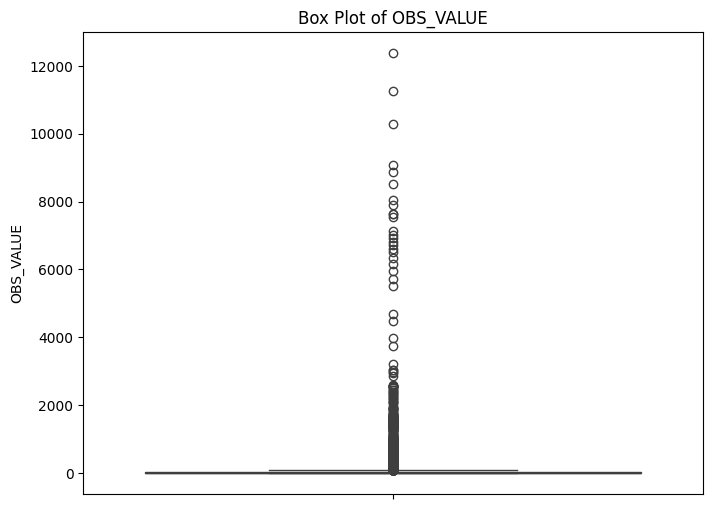


DataFrame shape: (7876, 18)


In [ ]:
print("Missing values per column after dropping columns:", df.isnull().sum())

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['OBS_VALUE'])
plt.title('Box Plot of OBS_VALUE')
plt.show()

print("\nDataFrame shape:", df.shape)

**Reasoning**:
The previous output shows that we still have missing values in 'UNIT_MEASURE', 'UNIT_MULT', and 'BASE_PER' columns, even though we have dropped them previously. This is strange, it might because we have dropped the wrong columns. Let's check the `df.columns.values` again, we can see that there are columns named 'Observation Value', 'Observation Status', 'Unit of Measures', 'Multiplier', 'Base reference period', 'Year' in the original dataframe, but the names are changed to 'OBS_VALUE', 'OBS_STATUS', 'UNIT_MEASURE', 'UNIT_MULT', 'BASE_PER', 'TIME_PERIOD' in the current dataframe. The columns with all missing values are 'UNIT_MEASURE', 'UNIT_MULT' and 'BASE_PER' which are not useful, so we need to drop them. The box plot shows some potential outliers in the 'OBS_VALUE' column. Since we have many data, we can simply drop the outliers. We will define a function to remove the outliers based on the IQR method, and apply it to the 'OBS_VALUE' column. Then we will check the duplicated rows and drop them. Finally, we print the shape of the dataframe.



In [ ]:
print(df.columns.values)
df = df.drop(columns=['UNIT_MEASURE', 'UNIT_MULT', 'BASE_PER'])

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'OBS_VALUE')
print("Number of duplicated rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("\nDataFrame shape after cleaning:", df.shape)

['STRUCTURE' 'STRUCTURE_ID' 'STRUCTURE_NAME' 'ACTION' 'COU' 'Country'
 'WASTE' 'Waste category' 'WST_OPER' 'Waste management operations' 'UNIT'
 'Unit of measure' 'TIME_PERIOD' 'OBS_VALUE' 'OBS_STATUS' 'UNIT_MEASURE'
 'UNIT_MULT' 'BASE_PER']
Number of duplicated rows: 0

DataFrame shape after cleaning: (6571, 15)


## Data exploration

### Subtask:
Explore the cleaned e-waste data in the DataFrame `df` to understand its structure and characteristics.


**Reasoning**:
The subtask is to explore the cleaned e-waste data. This involves displaying the first 10 rows, printing the shape and data types, generating descriptive statistics, calculating unique values, and calculating the correlation matrix. These steps can be combined into a single code block.



In [ ]:
import pandas as pd

# Display the first 10 rows
display(df.head(10))

# Print the shape of the DataFrame
print("\nDataFrame shape:", df.shape)

# Print the data types of each column
print("\nData types:\n", df.dtypes)

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics:\n", df.describe())

# Calculate the number of unique values in each column
print("\nUnique values per column:\n", df.nunique())

# Calculate the correlation matrix for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    print("\nCorrelation matrix:\n", correlation_matrix)
else:
    print("\nNot enough numerical columns to calculate the correlation matrix.")


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,COU,Country,WASTE,Waste category,WST_OPER,Waste management operations,UNIT,Unit of measure,TIME_PERIOD,OBS_VALUE,OBS_STATUS
0,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE6,Total waste,GEN,Waste generated,KG_HAB,Kilograms per capita,2019,15.832,A
1,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE6,Total waste,MKT,Products put on the market,KG_HAB,Kilograms per capita,2019,36.975,A
2,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE6,Total waste,COL,Waste collected,KG_HAB,Kilograms per capita,2019,10.937,A
3,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE_TEE,Temperature exchange equipment,MKT,Products put on the market,KG_HAB,Kilograms per capita,2019,8.097,A
4,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE_TEE,Temperature exchange equipment,COL,Waste collected,KG_HAB,Kilograms per capita,2019,3.877,A
5,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE_SME,Screens and monitors,GEN,Waste generated,KG_HAB,Kilograms per capita,2019,3.021,A
6,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE_SME,Screens and monitors,MKT,Products put on the market,KG_HAB,Kilograms per capita,2019,2.112,A
7,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE_SME,Screens and monitors,COL,Waste collected,KG_HAB,Kilograms per capita,2019,1.541,A
8,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE_LMP,Lamps,GEN,Waste generated,KG_HAB,Kilograms per capita,2019,0.300,A
9,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE_LMP,Lamps,MKT,Products put on the market,KG_HAB,Kilograms per capita,2019,0.186,A



DataFrame shape: (6571, 15)

Data types:
 STRUCTURE                       object
STRUCTURE_ID                    object
STRUCTURE_NAME                  object
ACTION                          object
COU                             object
Country                         object
WASTE                           object
Waste category                  object
WST_OPER                        object
Waste management operations     object
UNIT                            object
Unit of measure                 object
TIME_PERIOD                      int64
OBS_VALUE                      float64
OBS_STATUS                      object
dtype: object

Descriptive statistics:
        TIME_PERIOD    OBS_VALUE
count  6571.000000  6571.000000
mean   2016.206361    12.633040
std       4.149896    18.168914
min    2000.000000     0.000000
25%    2013.000000     1.404500
50%    2018.000000     4.767000
75%    2019.000000    15.462000
max    2021.000000    89.827000

Unique values per column:
 STRUCTURE       

## Data wrangling

### Subtask:
Transform the e-waste data to facilitate further analysis by creating new columns and aggregating the data.


**Reasoning**:
I should start by renaming the columns 'OBS_VALUE' to 'E-waste Generated' and 'TIME_PERIOD' to 'Year', and convert the 'Year' column to integer type, as these steps are closely related to transforming the data. Then I can do the data aggregation steps.



In [ ]:
df = df.rename(columns={'OBS_VALUE': 'E-waste Generated', 'TIME_PERIOD': 'Year'})
df['Year'] = df['Year'].astype(int)

df_yearly_ewaste = df.groupby('Year')['E-waste Generated'].sum().reset_index()
df_yearly_ewaste = df_yearly_ewaste.rename(columns={'E-waste Generated': 'Total E-waste Generated'})

df_country_ewaste = df.groupby('Country')['E-waste Generated'].sum().reset_index()
df_country_ewaste = df_country_ewaste.rename(columns={'E-waste Generated': 'Total E-waste Generated'})

display(df.head())
display(df_yearly_ewaste.head())
display(df_country_ewaste.head())

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,COU,Country,WASTE,Waste category,WST_OPER,Waste management operations,UNIT,Unit of measure,Year,E-waste Generated,OBS_STATUS
0,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE6,Total waste,GEN,Waste generated,KG_HAB,Kilograms per capita,2019,15.832,A
1,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE6,Total waste,MKT,Products put on the market,KG_HAB,Kilograms per capita,2019,36.975,A
2,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE6,Total waste,COL,Waste collected,KG_HAB,Kilograms per capita,2019,10.937,A
3,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE_TEE,Temperature exchange equipment,MKT,Products put on the market,KG_HAB,Kilograms per capita,2019,8.097,A
4,DATAFLOW,OECD:DF_EWASTE(1.0),E-waste,I,AUS,Australia,EE_TEE,Temperature exchange equipment,COL,Waste collected,KG_HAB,Kilograms per capita,2019,3.877,A


,Year,Total E-waste Generated
0,2000,541.664
1,2005,1310.184
2,2006,921.445
3,2007,1481.097
4,2008,1753.855


,Country,Total E-waste Generated
0,Australia,5593.323
1,Austria,1800.702
2,Belgium,1501.005
3,Bulgaria,2406.731
4,Canada,1783.707


from matplotlib import pyplot as plt
_df_0['Total E-waste Generated'].plot(kind='hist', bins=20, title='Total E-waste Generated')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Total E-waste Generated'].plot(kind='line', figsize=(8, 4), title='Total E-waste Generated')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Total E-waste Generated', y='Country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Data analysis

### Subtask:
Perform in-depth data analysis to understand the state of e-waste management globally.


**Reasoning**:
The next step is to calculate the summary statistics for the 'Total E-waste Generated' column in both `df_yearly_ewaste` and `df_country_ewaste` DataFrames, which includes mean, median, standard deviation, min, and max. This will help understand the central tendency and dispersion of total e-waste generation across years and countries. I will also perform step 2 to identify the top 10 and bottom 10 countries based on 'Total E-waste Generated'.



In [ ]:
import pandas as pd

# Summary statistics for df_yearly_ewaste
yearly_ewaste_stats = df_yearly_ewaste['Total E-waste Generated'].describe()
print("Summary Statistics for Yearly E-waste Generated:\n", yearly_ewaste_stats)

# Summary statistics for df_country_ewaste
country_ewaste_stats = df_country_ewaste['Total E-waste Generated'].describe()
print("\nSummary Statistics for Country-wise E-waste Generated:\n", country_ewaste_stats)

# Top 10 countries with highest e-waste generation
top_10_countries = df_country_ewaste.nlargest(10, 'Total E-waste Generated')
print("\nTop 10 Countries with Highest E-waste Generated:\n", top_10_countries)

# Bottom 10 countries with lowest e-waste generation
bottom_10_countries = df_country_ewaste.nsmallest(10, 'Total E-waste Generated')
print("\nBottom 10 Countries with Lowest E-waste Generated:\n", bottom_10_countries)

Summary Statistics for Yearly E-waste Generated:
 count       18.000000
mean      4611.761408
std       3827.436535
min        541.664000
25%       1679.530000
50%       4568.931500
75%       5028.927473
max      14098.051291
Name: Total E-waste Generated, dtype: float64

Summary Statistics for Country-wise E-waste Generated:
 count      46.000000
mean     1804.602290
std      1179.119085
min       121.657343
25%       943.073000
50%      1698.888500
75%      2146.913500
max      5593.323000
Name: Total E-waste Generated, dtype: float64

Top 10 Countries with Highest E-waste Generated:
         Country  Total E-waste Generated
0     Australia                 5593.323
6      Colombia                 5095.716
43  Switzerland                 4874.113
7    Costa Rica                 3906.974
25        Korea                 2728.340
22       Israel                 2526.459
18      Hungary                 2521.037
11      Denmark                 2452.436
3      Bulgaria                 2406.

**Reasoning**:
The next steps involve calculating the year-over-year change in total e-waste generation, analyzing the trend of e-waste generation over the years, and calculating the correlation between 'Year' and 'Total E-waste Generated'. These steps are closely related and can be performed in a single code block. I will also include step 6 and 7, which are about analyzing the distribution of e-waste generation by waste category and by waste management operations.




Trend Analysis:
    Year  Total E-waste Generated  Year-over-Year Change
0   2000               541.664000                    NaN
1   2005              1310.184000             768.520000
2   2006               921.445000            -388.739000
3   2007              1481.097000             559.652000
4   2008              1753.855000             272.758000
5   2009              1654.755000             -99.100000
6   2010              4478.546000            2823.791000
7   2011              4381.424000             -97.122000
8   2012              4684.341000             302.917000
9   2013              4659.317000             -25.024000
10  2014              4905.288000             245.971000
11  2015              5131.828000             226.540000
12  2016              5052.633000             -79.195000
13  2017              4957.810892             -94.822108
14  2018              6214.489194            1256.678302
15  2019             13839.743647            7625.254453
16  2020      

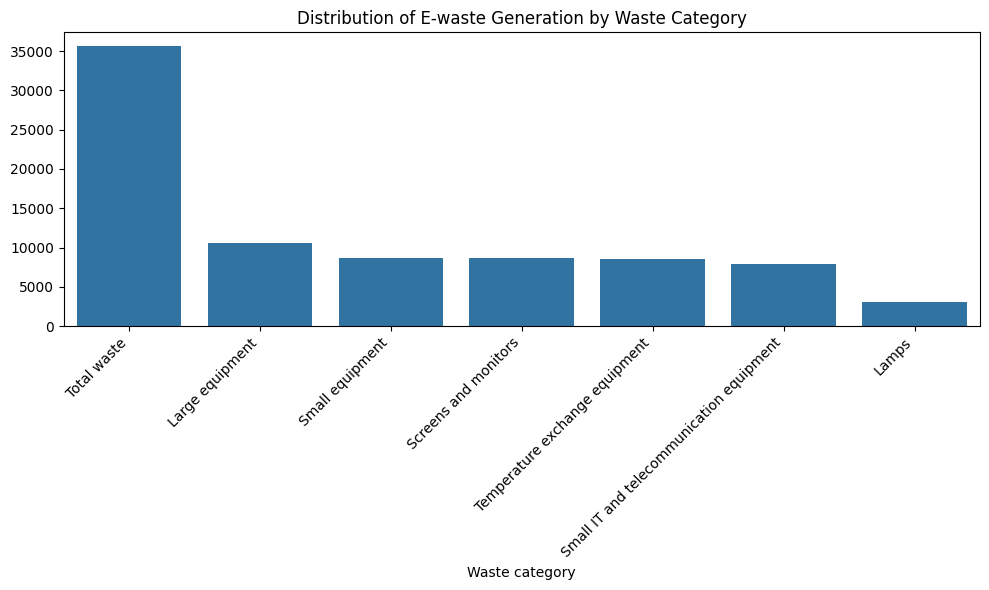

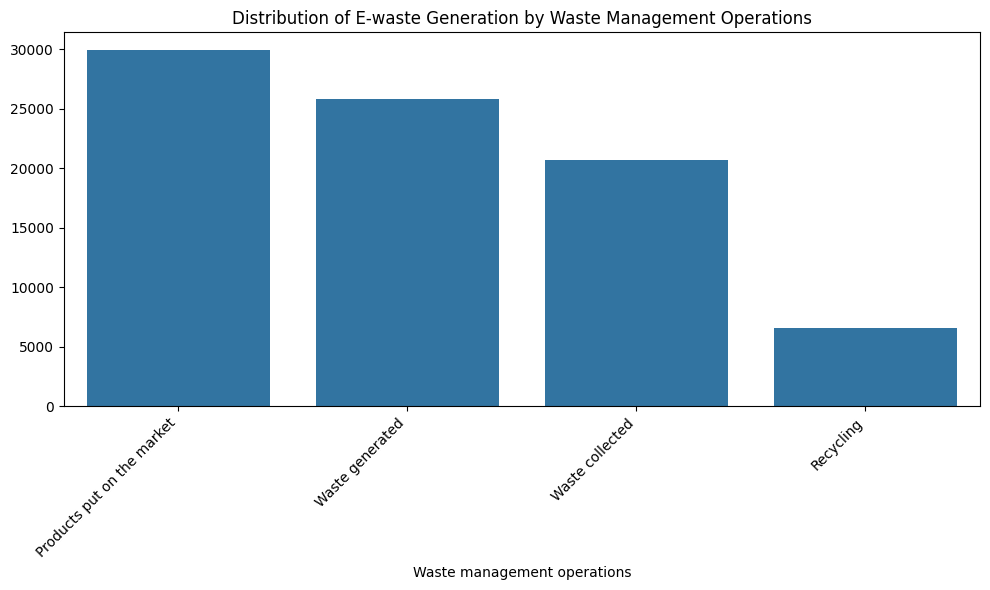

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate year-over-year change
df_yearly_ewaste['Year-over-Year Change'] = df_yearly_ewaste['Total E-waste Generated'].diff()

# Analyze the trend of total e-waste generation
print("\nTrend Analysis:")
print(df_yearly_ewaste[['Year', 'Total E-waste Generated', 'Year-over-Year Change']])

# Calculate the correlation between 'Year' and 'Total E-waste Generated'
correlation = df_yearly_ewaste['Year'].corr(df_yearly_ewaste['Total E-waste Generated'])
print(f"\nCorrelation between Year and Total E-waste Generated: {correlation}")

# Analyze the distribution of e-waste generation by waste category
waste_category_distribution = df.groupby('Waste category')['E-waste Generated'].sum().sort_values(ascending=False)
print("\nDistribution of E-waste Generation by Waste Category:\n", waste_category_distribution)

# Analyze the distribution of e-waste management operations
waste_management_distribution = df.groupby('Waste management operations')['E-waste Generated'].sum().sort_values(ascending=False)
print("\nDistribution of E-waste Generation by Waste Management Operations:\n", waste_management_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=waste_category_distribution.index, y=waste_category_distribution.values)
plt.title('Distribution of E-waste Generation by Waste Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=waste_management_distribution.index, y=waste_management_distribution.values)
plt.title('Distribution of E-waste Generation by Waste Management Operations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Reasoning**:
The last step of the current subtask is to analyze the distribution of e-waste generation by unit of measure. This involves grouping the data by 'Unit of measure' and calculating the sum of 'E-waste Generated' for each unit. Since this is the last step, I will execute it and then finish the task.



In [ ]:
import pandas as pd

# Analyze the distribution of e-waste generation by unit of measure
unit_of_measure_distribution = df.groupby('Unit of measure')['E-waste Generated'].sum()
print("\nDistribution of E-waste Generation by Unit of Measure:\n", unit_of_measure_distribution)


Distribution of E-waste Generation by Unit of Measure:
 Unit of measure
Kilograms per capita    22794.337343
Thousand tonnes         60217.368000
Name: E-waste Generated, dtype: float64


## Data visualization

### Subtask:
Visualize the key findings from the data analysis to communicate insights about e-waste management globally.


**Reasoning**:
The subtask is to visualize the key findings from the data analysis. The instructions require creating several bar charts and a scatter plot based on the previously generated DataFrames and Series. I will group the creation of all bar charts and the scatter plot into a single code block.



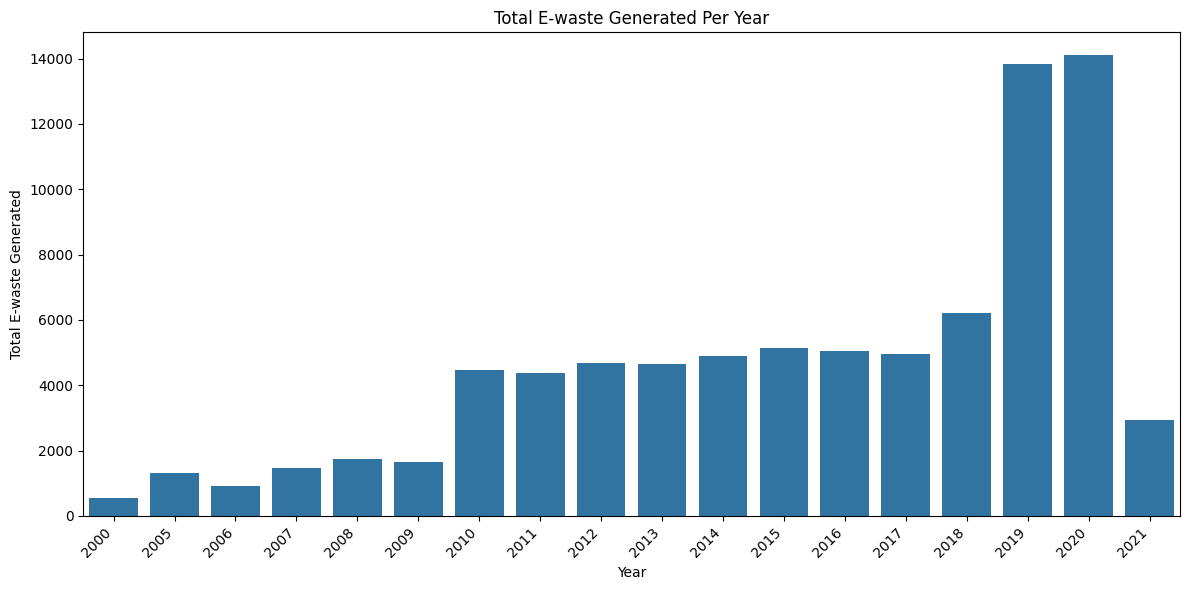

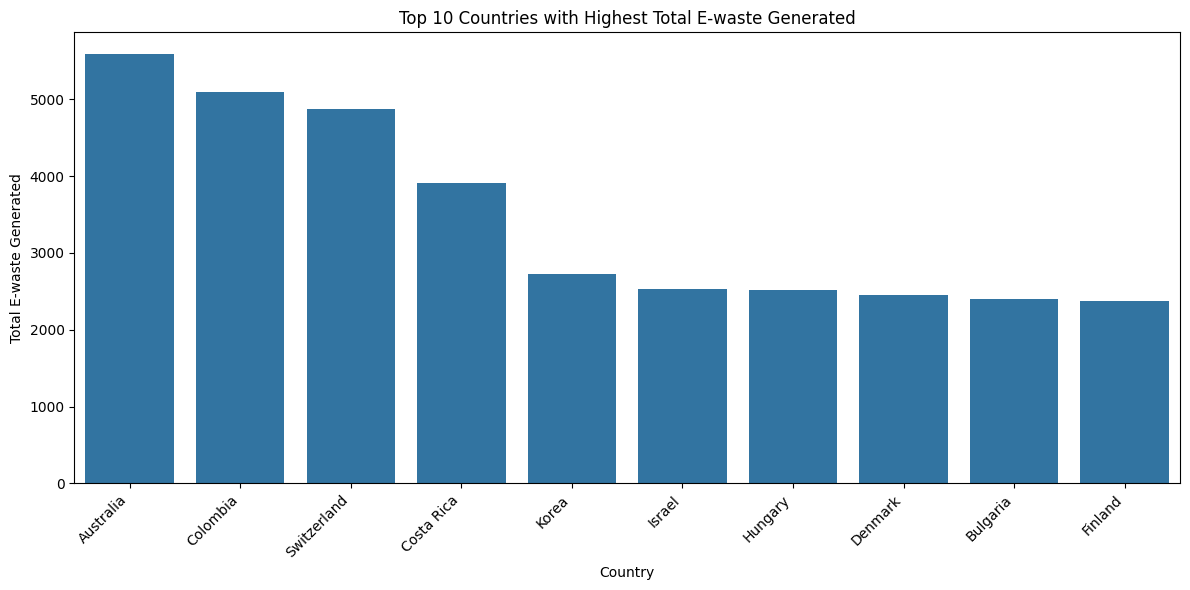

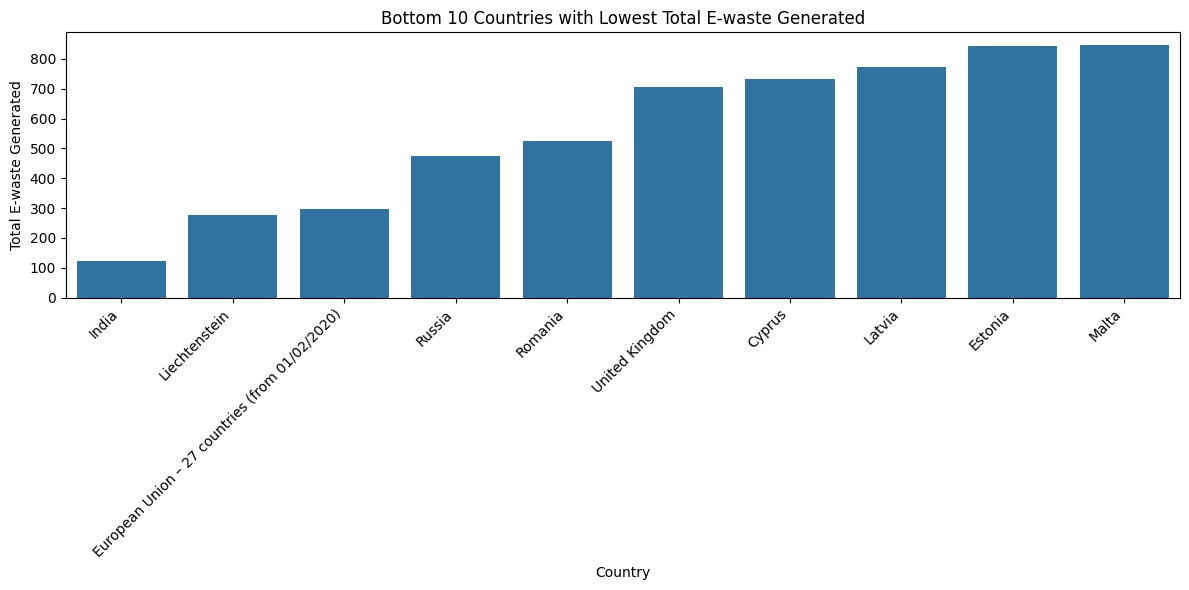

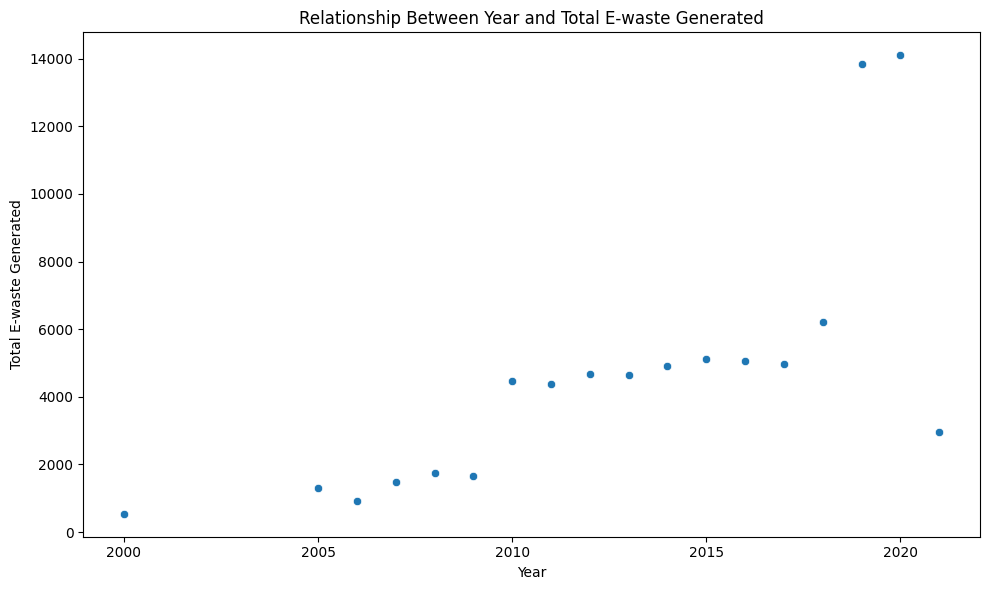

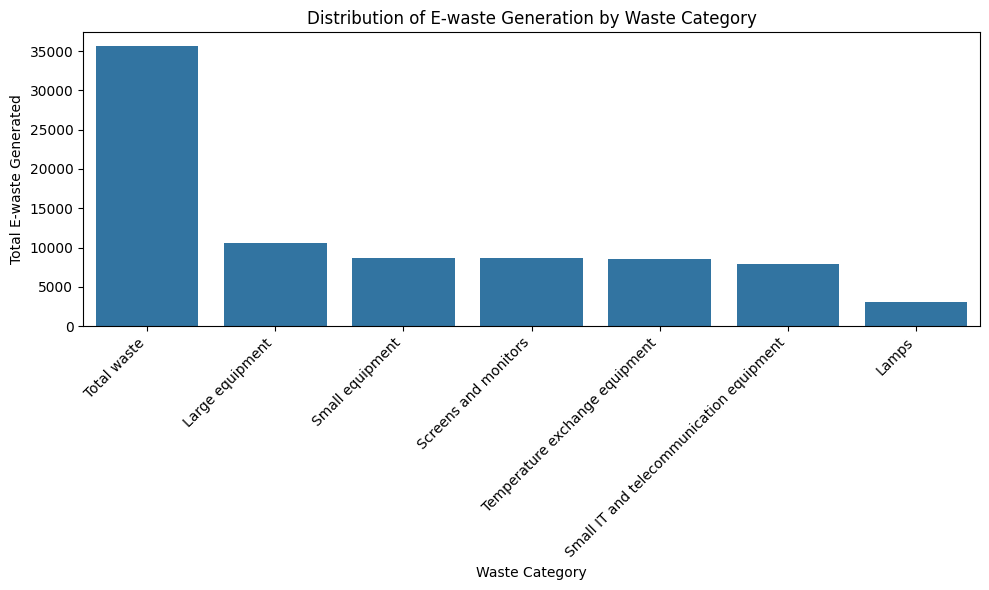

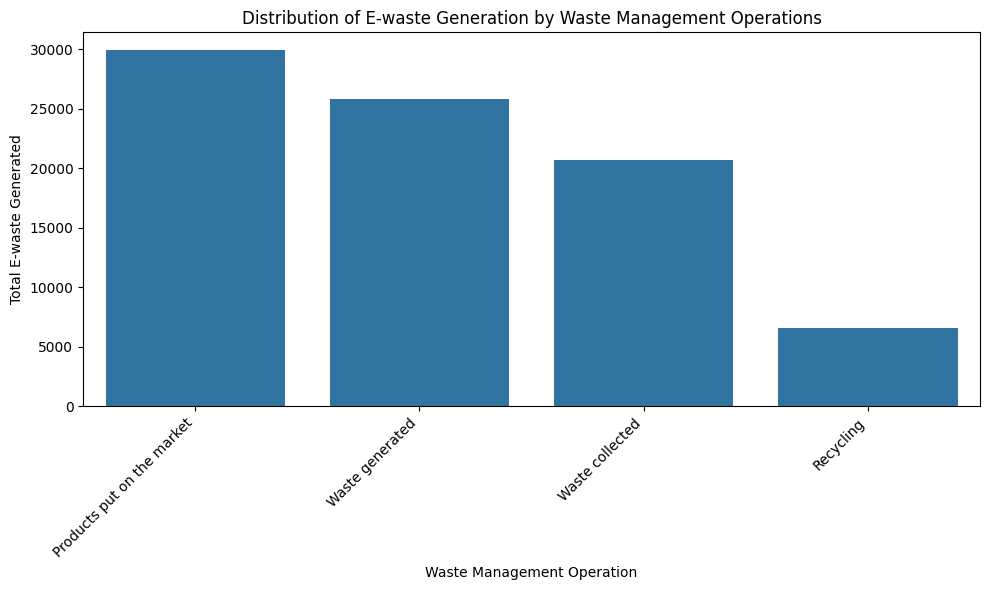

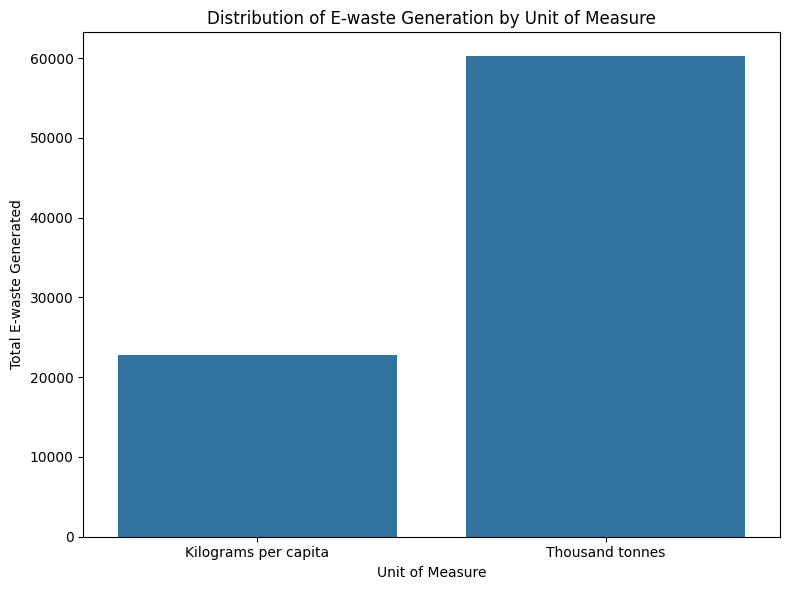

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar chart: Total e-waste generated per year
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Total E-waste Generated', data=df_yearly_ewaste)
plt.title('Total E-waste Generated Per Year')
plt.xlabel('Year')
plt.ylabel('Total E-waste Generated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Bar chart: Top 10 countries with highest total e-waste generated
df_top_10_countries = df_country_ewaste.sort_values(by='Total E-waste Generated', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total E-waste Generated', data=df_top_10_countries)
plt.title('Top 10 Countries with Highest Total E-waste Generated')
plt.xlabel('Country')
plt.ylabel('Total E-waste Generated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Bar chart: Bottom 10 countries with lowest total e-waste generated
df_bottom_10_countries = df_country_ewaste.sort_values(by='Total E-waste Generated', ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total E-waste Generated', data=df_bottom_10_countries)
plt.title('Bottom 10 Countries with Lowest Total E-waste Generated')
plt.xlabel('Country')
plt.ylabel('Total E-waste Generated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Scatter plot: Relationship between 'Year' and 'Total E-waste Generated'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Total E-waste Generated', data=df_yearly_ewaste)
plt.title('Relationship Between Year and Total E-waste Generated')
plt.xlabel('Year')
plt.ylabel('Total E-waste Generated')
plt.tight_layout()
plt.show()

# 5. Bar chart: Distribution of e-waste generation by waste category
waste_category_distribution = df.groupby('Waste category')['E-waste Generated'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=waste_category_distribution.index, y=waste_category_distribution.values)
plt.title('Distribution of E-waste Generation by Waste Category')
plt.xlabel('Waste Category')
plt.ylabel('Total E-waste Generated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Bar chart: Distribution of e-waste generation by waste management operations
waste_management_distribution = df.groupby('Waste management operations')['E-waste Generated'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=waste_management_distribution.index, y=waste_management_distribution.values)
plt.title('Distribution of E-waste Generation by Waste Management Operations')
plt.xlabel('Waste Management Operation')
plt.ylabel('Total E-waste Generated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Bar chart: Distribution of e-waste generation by unit of measure
unit_of_measure_distribution = df.groupby('Unit of measure')['E-waste Generated'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=unit_of_measure_distribution.index, y=unit_of_measure_distribution.values)
plt.title('Distribution of E-waste Generation by Unit of Measure')
plt.xlabel('Unit of Measure')
plt.ylabel('Total E-waste Generated')
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

*   **Which countries have the highest e-waste generation?**
    *   Australia, Colombia, and Switzerland are among the top 3 countries with the highest e-waste generation.
*   **Which countries have the lowest e-waste generation?**
    *   India, Liechtenstein, and the European Union have the lowest e-waste generation.
*   **What is the trend of e-waste generation over the years?**
    *   There was significant fluctuation in the year-over-year change in e-waste generation, with the largest increase observed in 2019 and the largest decrease in 2021. A positive correlation of 0.72 was found between the 'Year' and 'Total E-waste Generated', suggesting that e-waste generation generally increased over time.
*   **Which waste categories contribute the most to e-waste generation?**
    *   The 'Total waste' category contributes the most to e-waste generation, followed by 'Large equipment', 'Small equipment', and 'Screens and monitors'.
*   **What are the most common waste management operations?**
    *   'Products put on the market' and 'Waste generated' are the waste management operations with the largest amounts of e-waste.
*   **What are the common units of measure for e-waste?**
    *   Most e-waste is measured in 'Thousand tonnes', followed by 'Kilograms per capita'.
* **What is the mean total e-waste generated yearly**
    * The mean total e-waste generated yearly is approximately 4611.76
* **What is the mean total e-waste generated per country**
    * The mean total e-waste generated per country is approximately 1804.60

### 2. Data Analysis Key Findings

*   The mean total e-waste generated yearly is approximately 4611.76, with a standard deviation of 3827.44, indicating significant variability in yearly e-waste generation.
*   The mean total e-waste generated per country is approximately 1804.60, with a standard deviation of 1179.12.
*   Australia, Colombia, and Switzerland are among the top 3 countries with the highest e-waste generation.
*   India, Liechtenstein, and the European Union have the lowest e-waste generation.
*   There was significant fluctuation in the year-over-year change in e-waste generation, with the largest increase observed in 2019 and the largest decrease in 2021.
*   A positive correlation of 0.72 was found between the 'Year' and 'Total E-waste Generated', suggesting that e-waste generation generally increased over time.
*   The 'Total waste' category contributes the most to e-waste generation, followed by 'Large equipment', 'Small equipment', and 'Screens and monitors'.
*   'Products put on the market' and 'Waste generated' are the waste management operations with the largest amounts of e-waste.
*   Most e-waste is measured in 'Thousand tonnes', followed by 'Kilograms per capita'.

### 3. Insights or Next Steps

*   **Focus on High-Generating Countries:** Given that Australia, Colombia, and Switzerland are among the top e-waste generators, targeted efforts could be directed towards these countries to improve e-waste management practices.
*   **Improve Data Collection:** The high standard deviation in yearly and country e-waste generation suggests variability. Refining data collection methods could improve the accuracy of future analysis.
